In [ ]:
#This file is used to setup the SamplingRVs.py file function
#It automates the CDF creation in deliberate steps, outlined in each block
#It should help you see what each major block does.

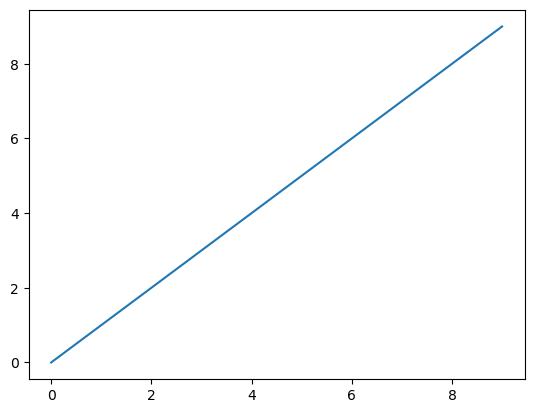

In [1]:
#package imports
#If using Jupyter locally, make sure you have pip installed saphires and any dependencies you need.
#You should have done this as part of our last lab
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Qt5Agg') #comment this line out if using colab
import numpy as np
import os
from scipy.optimize import curve_fit
#from matplotlib.backends.backend_pdf import PdfPages



#%matplotlib inline
#import pickle as pkl
#from scipy.ndimage import gaussian_filter
#import astropy
#import saphires as saph #if using colab comment out this line.
import random
x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()
plt.show()
from scipy.optimize import fsolve

In [2]:
#
#
#
#
#
#


In [3]:
#Simulate an Orbital Period
#Investigate Sampling accuracy
#Assume RV measurment is 100% accurate?
#Assume some Error?

#Create Orbital Period
#Sample a certain amount of times
#See correlation to our data.
#How accurate can we be // how many observations do we need to get within a certain accuracy?




#When sampling, sample randomly across given arrays
#Introduce error, so multibly 'measurment' by some value?
    #Can probably do this via sampling from a Gaussian distribution
    #Introduces more variability
    #Most measurments will be near center, with some more extremes
    #Better simulation of measurment



C:/Users/Jonah/Astro/Stars/DATA/table1.dat
17
Data length:  1895

periods length:  1714
RS length:  1271
SSG length:  443
Extra length:  9

TESS RS length:  840
TESS SSGs length:  239
TESS Total length:  1079

['1', '1', '2', '1', '2', '0', '2', '1', '1']
[189, 411, 421, 475, 804, 875, 1178, 1660, 1778]
['RS', 'RS', 'RS', 'SSG', 'SSG', 'SSG', 'RS', 'SSG', 'SSG']
1714


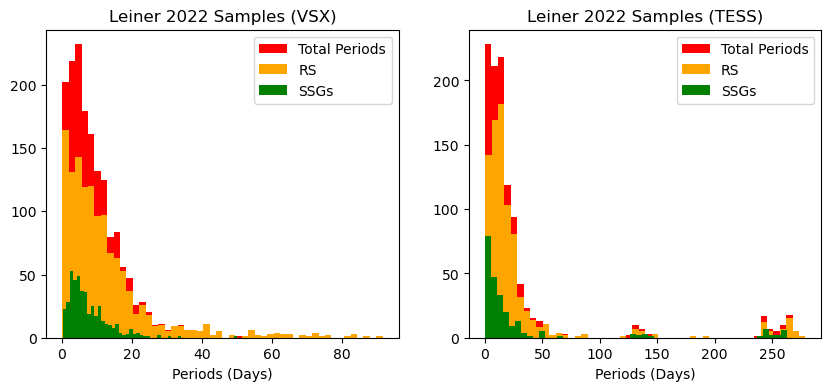

In [5]:
#Adding star values from RSCVn range

file = 'table1.dat'
import os
import glob
folder_path = 'C:/Users/Jonah/Astro/Stars/DATA/' + file  # Change this to the path of your folder

print(folder_path)

#.dat file extraction, checks .p


def is_float(string):
    #True if given string is float else False
    try:
        return float(string)
    except ValueError:
        return False

stardata = []
with open(folder_path, 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split("     ")
        stardata.append([float(i) if is_float(i) else i for i in k])
stardata = np.array(stardata, dtype='O')



# Read a plain text .dat file
data = []
with open(folder_path, 'r') as file:
    for line in file:
        columns = line.split()  # Splits by any whitespace
        #print(len(columns))
        if len(columns) == 18:
            combined_element = columns[1] + ' ' + columns[2]
            new_array = [columns[0], combined_element] + columns[3:]
            #print(new_array)
            #print(len(new_array))
            data.append(new_array)
            #print()
        else:
            #print(columns)
            data.append(columns)
            #print()
#print(float(data[1][12]))
print(len(data[0]))
print("Data length: ", len(data))
#for i in range(len(data)):
    #print(data[i])
periods = []
RSsP = []
SSGsP = []
extra = []
test = []
extraind = []
extraid = []

TessRS = []
TessSSGs = []
Tessperiods = []
for i in range(len(data)):
    
    if data[i][16] == 'RS':
        RSsP.append(data[i][11])
        periods.append(data[i][11])
        if float(data[i][12]) != -999:
            TessRS.append(data[i][12])
            Tessperiods.append(data[i][12])
    elif data[i][16] == 'SSG':
        SSGsP.append(data[i][11])
        test.append(data[i][16])
        periods.append(data[i][11])
        if float(data[i][12]) != -999:
            TessSSGs.append(data[i][12])
            Tessperiods.append(data[i][12])
    elif data[i][16] != 'cut':
        extra.append(data[i][16])
        extraind.append(i)
        extraid.append(data[i][len(data[i])-1])
        #periods.append(data[i][11])
print()
print("periods length: ", len(periods))
print("RS length: ", len(RSsP))
print("SSG length: ", len(SSGsP))
print("Extra length: ", len(extra))
print()
print("TESS RS length: ", len(TessRS))
print("TESS SSGs length: ", len(TessSSGs))
print("TESS Total length: ", len(Tessperiods))
print()
print(extra)
print(extraind)
print(extraid)
periods = [float(item) for item in periods]
SSGsP = [float(item) for item in SSGsP]
RSsP = [float(item) for item in RSsP]
print(len(periods))
#print(periods)
#print(periods)

Tessperiods = [float(item) for item in Tessperiods]
TessSSGs = [float(item) for item in TessSSGs]
TessRS = [float(item) for item in TessRS]




fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)



ax1.hist(periods, 50, color = 'r', label = "Total Periods")
ax1.hist(RSsP, 50, color = 'orange', label = "RS")#, density = True)
ax1.hist(SSGsP, 50, color = 'g', label = "SSGs")#, density = True)
ax1.set_title("Leiner 2022 Samples (VSX)")
ax1.set_xlabel("Periods (Days)")
#ax1.set_xlim(right = 50)
plt.legend()


ax2 = fig.add_subplot(122)
ax2.hist(Tessperiods, 50, color = 'r', label = "Total Periods")
ax2.hist(TessRS, 50, color = 'orange', label = "RS")#, density = True)
ax2.hist(TessSSGs, 50, color = 'g', label = "SSGs")#, density = True)
ax2.set_title("Leiner 2022 Samples (TESS)")
ax2.set_xlabel("Periods (Days)")
#ax2.set_xlim(right = 50)
plt.legend()
plt.show()




SSGperiods = SSGsP
Tessperiods = TessSSGs


SSGperiods = RSsP

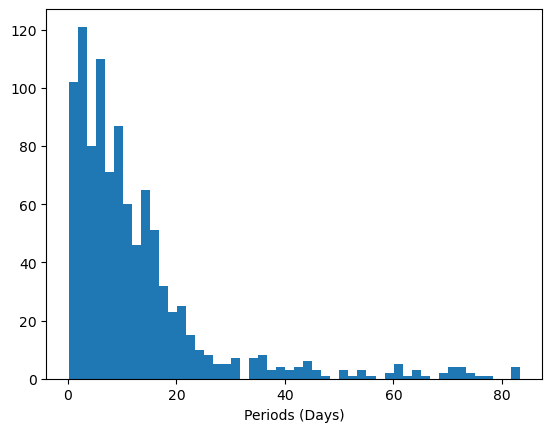

In [6]:
randPvals = []
for i in range(1000):
    ###
    hist_counts, bins = np.histogram(SSGperiods, bins=25, density=True)
        
    # Compute the PDF
    pdfdata = hist_counts / sum(hist_counts)
        
    # Compute the CDF
    cdfdata = np.cumsum(pdfdata)
    cdfdata = np.insert(cdfdata, 0, 0)  # Insert 0 at the beginning for the first bin edge
        
    # Generate a uniform random number
    uniform_random_value = np.random.rand()
        
    # Map the uniform random number to the histogram distribution
    PorbRand = np.interp(uniform_random_value, cdfdata, bins)
    randPvals.append(PorbRand)
    #print(f"Random value drawn from the histogram distribution: {PorbRand}")
    
    ###

plt.hist(randPvals, bins = 50)
plt.xlabel("Periods (Days)")
plt.show()

In [11]:
#Current Method




#Begin Loop, some number of times

#Create one new period, drawn from a distribution
#Simulate mass ratios
#Using period, extract K value (amplitude of sin wave)
#Generate Orbit
#Randomize number of Samples
#Sample from generated orbit
#Calculate Amplitude of this sample (measured K)
#Record P, actual K, measured K for analysis

#Repeat for looped samples

In [14]:
totcorr = []
numsamp = []
logPvals, logPfullvals, logP1000vals, logPtidal = [], [], [], []
inclinations = []
randPvals = []
    
actual1, actual2, actual3 = [], [], []
measured1, measured2, measured3 = [], [], []
periods1, periods2, periods3 = [], [], []
Kvals1, Kvals2, Kvals3 = [], [], []

actual1e, actual2e, actual3e = [], [], []
measured1e, measured2e, measured3e = [], [], []
periods1e, periods2e, periods3e = [], [], []
Kvals1e, Kvals2e, Kvals3e = [], [], []
eccens, eccens_logPvals = [], []


from tqdm import tqdm

# Adding progress bar to the loop
for i in tqdm(range(10000), desc="Processing"):
    
    Msol = 1.9891 * 10**30 #kg
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    ###############
    #Create Period options
    
    
    
    #Lognormal Distribution
    ux = 4.8
    ox = 2.3
    mode = 4.8

    #Raghavan numbers: ux = 5.03, ox = 2.28, mode = 5.03
    
    u = np.log( (ux**2) / np.sqrt(ux**2 + ox**2))
    o = np.sqrt( np.log(1 + (ox**2 / ux**2)))
    um = np.log(mode) + o**2
        
    #print("Ux = ", ux)
    #print("Ox = ", ox)
    #print("Sigma input: ", o)
    #print("Mu input:", um)
    #print("------------------------------")
    #print()
    
    m1 = random.uniform(0.9, 2)
    m2 = random.uniform(0.1, m1)
    def lognormal(mean, sigma, range):
        while True:
            logP = np.random.lognormal(mean, sigma)
            if logP>0 and logP < range:
                break
        return logP
    
    
    while True:
        logP = lognormal(um, o, 1.5) #10^1.5 = 31 days
        logvalue = 10**logP
    
        if logvalue <= 30:
            break  # Accept the value if it's within the desired range


    
    logPfull = lognormal(um, o, 30)  # 10^30
    logP1000 = lognormal(um, o, 3)  #10^3
        
    
    #Tidally Locked Distribution
    hist_counts, bins = np.histogram(SSGperiods, bins=25, density=True)
    # Compute the PDF
    pdfdata = hist_counts / sum(hist_counts)  
    # Compute the CDF
    cdfdata = np.cumsum(pdfdata)
    cdfdata = np.insert(cdfdata, 0, 0)  # Insert 0 at the beginning for the first bin edge

    
    while True:
        uniform_random_value = np.random.rand()
        PorbRand = np.interp(uniform_random_value, cdfdata, bins)
    
        if PorbRand <= 35:
            break  # Accept the value if it's within the desired range

    
    logtidal = np.log10(PorbRand)
    
    logPvals.append(logP)
    logPfullvals.append(logPfull)
    logP1000vals.append(logP1000)
    logPtidal.append(logtidal)
    ###########################
    ###########################

    

    
    ###########################
    ###########################     
    
    #Simulate Mass Ratios, Inclinations
    M1 = m1 * Msol
    M2 = m2 * Msol
    v = random.uniform(0,1)
    incl = np.arccos(2 * v - 1)
    inclinations.append(incl)
    
    ###########################
    ###########################
    #Decide on Period
    
    b1 = 10**logP                   #Lognormal, 0-30 days
    #b = 10**logPfull               #Lognormal, full range 0-inf days
    b2 = 10**logP1000               #Lognormal, 0-1000 days
    #b = np.random.uniform(1,30)    #Uniform, 1-30 days
    #b = np.random.uniform(1,1000)  #Uniform, 1-1000 days
    b3 = 10 ** logtidal                   #Tidally Locked sample
    
    ###########################
    ###########################
    #Generate Orbit
    x = np.linspace(0, 365*2, 10000) 
    def genorbit(b):
        Porb = b * 86400
        #Period range, 0-2 years 
            
        #Generate amplitude from orbit, mass ratios
        K = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2)  )**(1/3)
        #Ke = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2  * (1-e**2)**3/2)  )**(1/3)
        #Kvals.append(K/1000)
        #Kvalse.append(Ke/1000)
        
        a = K/1000                      #Amplitude
        c = np.random.random() * 10     #Shift
        #d = np.random.random() * np.random.random()*10           #Shift up/down
        
        #print("M1:", M1, "Msol")
        #print("M2:", M2, "Msol")
        #print("Inclination:", np.rad2deg(incl), "Degrees")
            
        #print("Amplitude (km/s):", a)
        #print("Period (Days):", b)
        #print("Shift:", c)
            
        #print(a, "* sin(2pi/", b, "*x +", c, ")")# + d")
        #print()    
        equation = a* np.sin(((2*np.pi)/b)*x + c)
        return equation, a, b

    ###########################
    ###########################

    
    def genorbit_e(Period):   
        
        P = Period
        Porb = Period * 86400
        
        #print(f"P: {Period} days")
            
        if np.log10(P) < 1:
            e = 0
        elif np.log10(P) >= 1 and np.log10(P) < 2:
            e = random.uniform(0, 0.4)
        elif np.log10(P) >= 2:
            e = random.uniform(0.2, 0.6)
        eccens.append(e)
        eccens_logPvals.append(np.log10(Period))
    
            
        Ke = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2  * (1-e**2)**3/2)  )**(1/3)
        #print("Ke:", Ke/1000)
        
        # Orbital Parameters
        omega = np.deg2rad(np.random.uniform(0, 360))  # Argument of periapsis in radians
    
        t = x
        n = 2 * np.pi / P  # Mean motion (rad/day)
        
        # Mean anomaly M(t)
        M = n * t
        
        # Solve Kepler's equation using Newton-Raphson method
        #This improves speed of calculation, as opposed to scipy fsolve
        E = M.copy()
        def newton_solve_kepler(E, M, e, tol=1e-6, max_iter=100):
            for _ in range(max_iter):
                f_E = E - e * np.sin(E) - M
                f_prime_E = 1 - e * np.cos(E)
                delta_E = -f_E / f_prime_E
                E += delta_E
                if np.all(np.abs(delta_E) < tol):
                    break
            return E
        
        E = newton_solve_kepler(E, M, e)
        
        # Compute True Anomaly nu(t)
        nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
        
        # Compute Radial Velocity v_r(t)
        v_r = Ke * (np.cos(omega + nu) + e * np.cos(omega))
        
        # Plot results
        return v_r/1000, Ke/1000, P


    ###########################
    ###########################

    
    orbit1, a1, b1 = genorbit(b1)
    orbit2, a2, b2 = genorbit(b2)
    orbit3, a3, b3 = genorbit(b3)


    orbit1e, a1e, b1e = genorbit_e(b1)
    orbit2e, a2e, b2e = genorbit_e(b2)
    orbit3e, a3e, b3e = genorbit_e(b3)

    #orbit = orbit1
    ###########################
    ###########################
    
    #Generate random samples
    samples = random.randint(3, 14)
    #print("Number of Samples:", samples)
    
    ###########################
    ###########################
    
    #Sample from random orbit
    def sample(orbit, samples):
        xval = []
        yval = []
        obsday = 0
        prevsamp = int((np.random.random()*10000) - 1)
        for k in range(samples):
            obsday = obsday + 1
            #print(obsday)
            if obsday < int(np.random.random()*2)+2:
                #print("<rand")
                #print(prevsamp)
                samp = prevsamp + int(np.random.random()*75)
                if samp > 9999:
                    samp = 9999
                    #print("Limit Hit")
                prevsamp = samp
                #print("Km/s:", orbit[samp])
                #print("Day:", x[samp])
                yval.append(orbit[samp])
                xval.append(x[samp])
                #print(samp)
                
            else:
                #print("else")
                samp = int((np.random.random()*10000))
                #print(prevsamp)
                if samp > 9999:
                    samp = 9999
                    #print("Limit Hit")
                prevsamp = int((np.random.random()*10000) - 1)
                prevsamp = samp
                #print("Km/s:", orbit[samp])
                #print("Day:", x[samp])
                
                yval.append(orbit[samp])
                xval.append(x[samp])
                obsday = 0
                #print(samp)
                #print(obsday)
            #print()
        return xval, yval

    xval1, yval1 = sample(orbit1, samples)
    xval2, yval2 = sample(orbit2, samples)
    xval3, yval3 = sample(orbit3, samples)


    xval1e, yval1e = sample(orbit1e, samples)
    xval2e, yval2e = sample(orbit2e, samples)
    xval3e, yval3e = sample(orbit3e, samples)


    
    def plotorbs(xval, yval, orbit):
            
        
                #print()
        fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 
        # First plot
        axs[0].scatter(x, orbit, marker=".", s=1)
        axs[0].axhline(0, color="red")
        axs[0].set_title("Simulated Orbit")
        axs[0].set_xlabel("Period (days)")
        axs[0].set_ylabel("Velocity (km/s)")
        axs[0].set_xlim(-10,(365*2)+10)
            
        # Second plot
        axs[1].scatter(xval, yval, marker=".")
        axs[1].plot(x, orbit, alpha = 0.1)
        axs[1].axhline(0, color="red", alpha=0.5)
        axs[1].set_title("Simulated Observations")
        axs[1].set_xlabel("Period (days)")
        axs[1].set_ylabel("Velocity (km/s)")
        axs[1].set_xlim(-10,(365*2)+10)
            
        plt.tight_layout()  # Adjust spacing between plots
        plt.show()

    #plotorbs(xval1, yval1, orbit1)
    #plotorbs(xval2, yval2, orbit2)
    #plotorbs(xval3, yval3, orbit3)
    
    #plotorbs(xval1e, yval1e, orbit1e)
    #plotorbs(xval2e, yval2e, orbit2e)
    #plotorbs(xval3e, yval3e, orbit3e)
    
    ###########################
    ###########################
    #Calculate Amplitude of this sample (measured K)
    def measure(yval, a):
        std = np.std(yval)
        #print("Standard Deviation:", std)
        Amp = (np.max(yval) - np.min(yval)) / 2
        
        
        #print("Measured Amplitude (K Value):", Amp) 
        #print("Actual Amplitude (K Value):", a)
        #print()
        return Amp, std

    Amp1, std1 = measure(yval1, a1)
    Amp2, std2 = measure(yval2, a2)
    Amp3, std3 = measure(yval3, a3)

    Amp1e, std1e = measure(yval1e, a1e)
    Amp2e, std2e = measure(yval2e, a2e)
    Amp3e, std3e = measure(yval3e, a3e)
    
    ###########################
    ###########################
    
    #Record P, actual K, measured K for analysis
    
    #Do correlation:
    #corr = Amp/a
    #totcorr.append(corr * 100)
    #print("Corr:", corr*100)

    actual1.append(a1)
    actual2.append(a2)
    actual3.append(a3)
    actual1e.append(a1e)
    actual2e.append(a2e)
    actual3e.append(a3e)

    measured1.append(Amp1)
    measured2.append(Amp2)
    measured3.append(Amp3)
    measured1e.append(Amp1e)
    measured2e.append(Amp2e)
    measured3e.append(Amp3e)

    periods1.append(b1)
    periods2.append(b2)
    periods3.append(b3)
    periods1e.append(b1e)
    periods2e.append(b2e)
    periods3e.append(b3e)

    Kvals1.append(a1)
    Kvals2.append(a2)
    Kvals3.append(a3)
    Kvals1e.append(a1e)
    Kvals2e.append(a2e)
    Kvals3e.append(a3e)

    #print()
    #print(Amp1, a1, b1)
    #print(Amp2, a2, b2)
    #print(Amp3, a3, b3)

Processing: 100%|██████████| 10000/10000 [01:46<00:00, 94.07it/s]


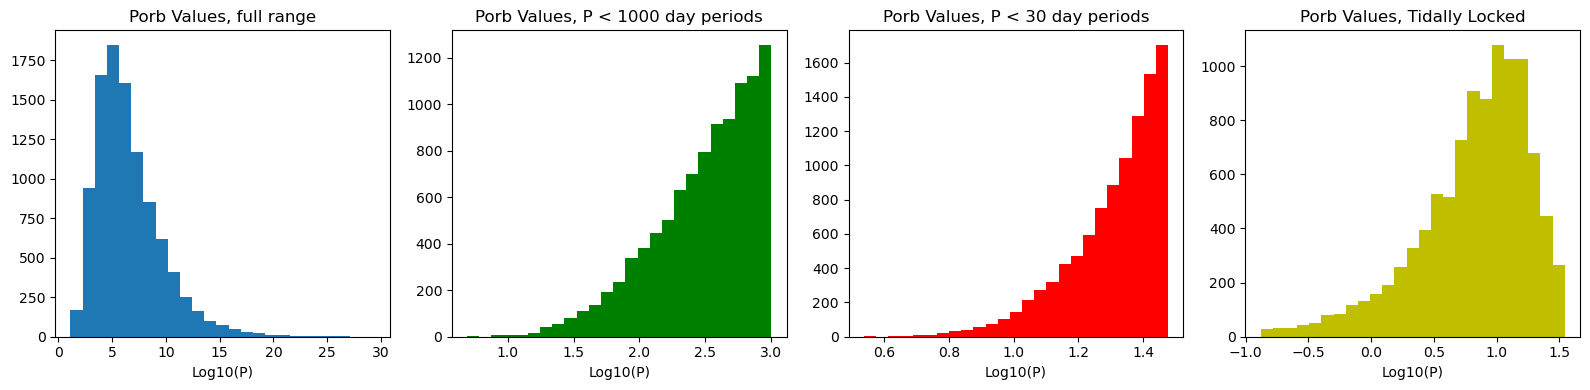

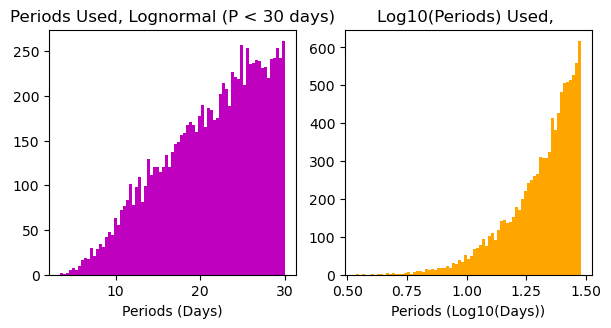

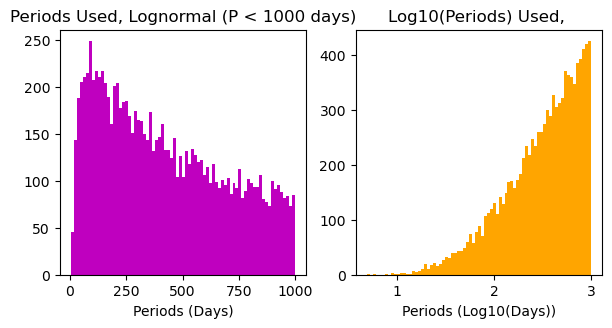

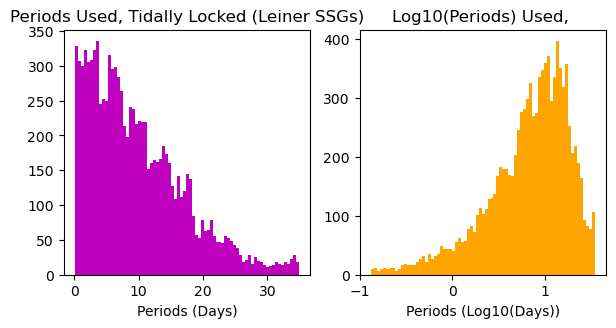

In [18]:
import matplotlib.pyplot as plt
logPvals = np.array(logPvals)
logPfullvals = np.array(logPfullvals)
logP1000vals = np.array(logP1000vals)
logPtidal = np.array(logPtidal)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

axes[0].hist(logPfullvals, 25)
axes[0].set_title("Porb Values, full range")
axes[0].set_xlabel("Log10(P)")

axes[1].hist(logP1000vals, 25, color='g')
axes[1].set_title("Porb Values, P < 1000 day periods")
axes[1].set_xlabel("Log10(P)")

axes[2].hist(logPvals, 25, color='r')
axes[2].set_title("Porb Values, P < 30 day periods")
axes[2].set_xlabel("Log10(P)")

axes[3].hist(logPtidal, 25, color='y')
axes[3].set_title("Porb Values, Tidally Locked")
axes[3].set_xlabel("Log10(P)")

plt.tight_layout()
plt.savefig("Dist_Test_1", dpi = 300)
plt.show()




def plotused(periods, title):
    fig = plt.figure(figsize = (7,7))
    ax1 = fig.add_subplot(221)
    ax1.hist(periods, bins = 75, color = "m")
    ax1.set_title("Periods Used, "+ title)
    ax1.set_xlabel("Periods (Days)")
    
    
    
    ax2 = fig.add_subplot(222)
    ax2.hist(np.log10(periods), bins = 75, color = "orange")
    ax2.set_title("Log10(Periods) Used, ")
    ax2.set_xlabel("Periods (Log10(Days))")
    
    plt.show()


plotused(periods1, "Lognormal (P < 30 days)")
plotused(periods2, "Lognormal (P < 1000 days)")
plotused(periods3, "Tidally Locked (Leiner SSGs)")

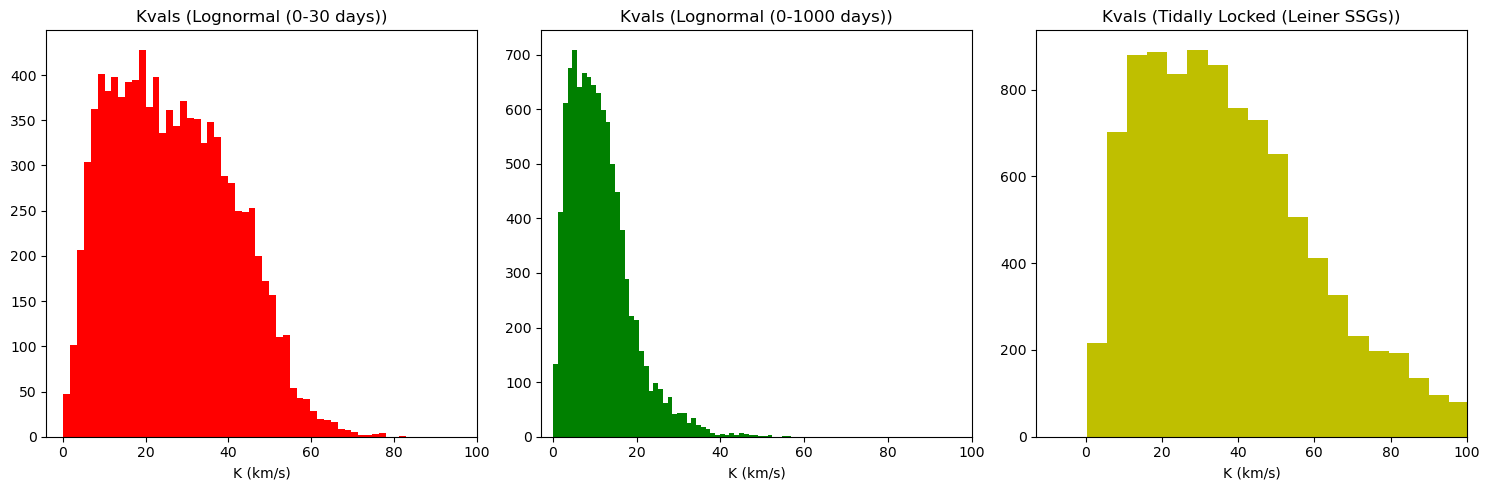

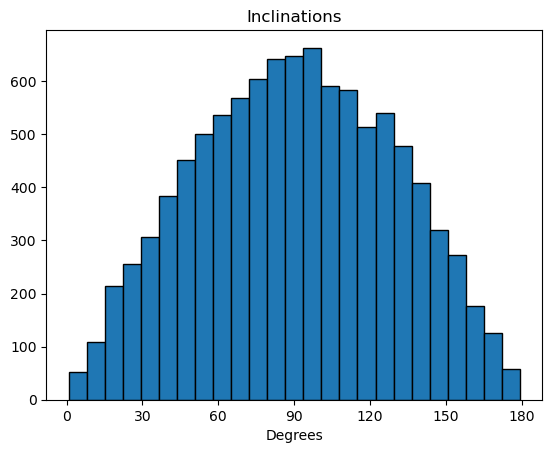

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Kvals1, bins=50, color = 'r')
axes[0].set_title("Kvals (Lognormal (0-30 days))")
axes[0].set_xlabel("K (km/s)")
axes[0].set_xlim(right = 100)

axes[1].hist(Kvals2, bins=50, color = 'g')
axes[1].set_title("Kvals (Lognormal (0-1000 days))")
axes[1].set_xlabel("K (km/s)")
axes[1].set_xlim(right = 100)

axes[2].hist(Kvals3, bins=50, color = 'y')
axes[2].set_title("Kvals (Tidally Locked (Leiner SSGs))")
axes[2].set_xlabel("K (km/s)")
axes[2].set_xlim(right = 100)

plt.tight_layout()  # Adjust spacing
plt.show()

print()

plt.hist(np.rad2deg(inclinations), bins = 25, edgecolor = "black")
plt.title("Inclinations")
plt.xlabel("Degrees")
plt.xticks(np.arange(0, 185, 30))
plt.show()

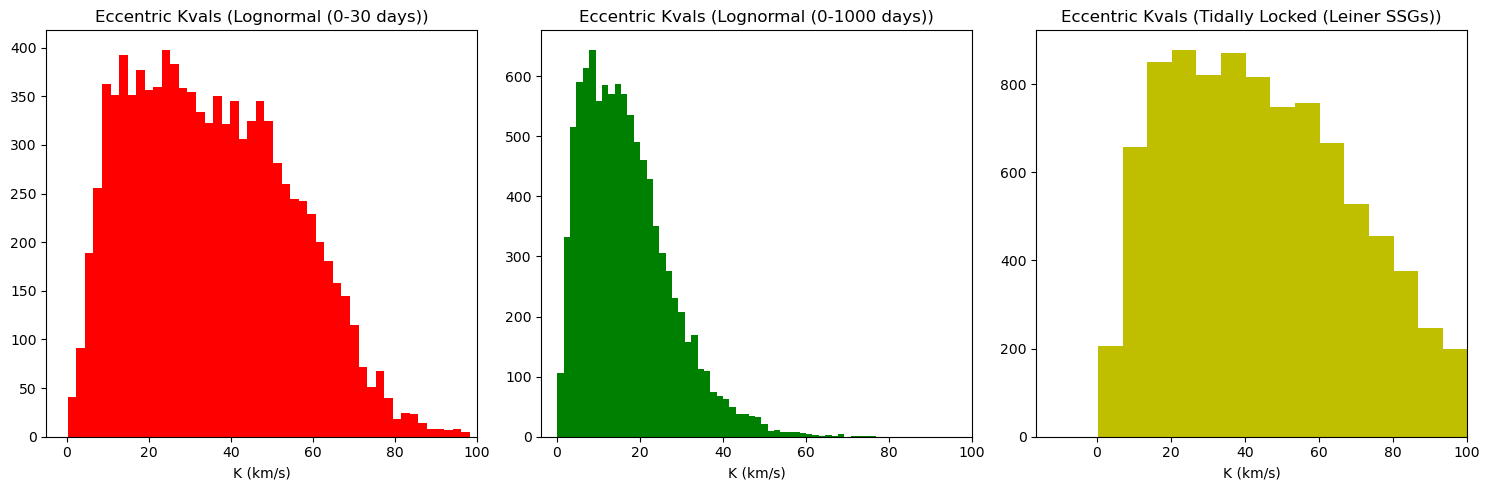

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Kvals1e, bins=50, color = 'r')
axes[0].set_title("Eccentric Kvals (Lognormal (0-30 days))")
axes[0].set_xlabel("K (km/s)")
axes[0].set_xlim(right = 100)

axes[1].hist(Kvals2e, bins=50, color = 'g')
axes[1].set_title("Eccentric Kvals (Lognormal (0-1000 days))")
axes[1].set_xlabel("K (km/s)")
axes[1].set_xlim(right = 100)

axes[2].hist(Kvals3e, bins=50, color = 'y')
axes[2].set_title("Eccentric Kvals (Tidally Locked (Leiner SSGs))")
axes[2].set_xlabel("K (km/s)")
axes[2].set_xlim(right = 100)

plt.tight_layout()  # Adjust spacing
plt.show()



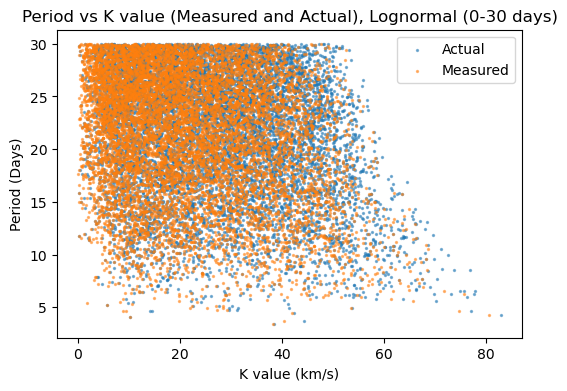

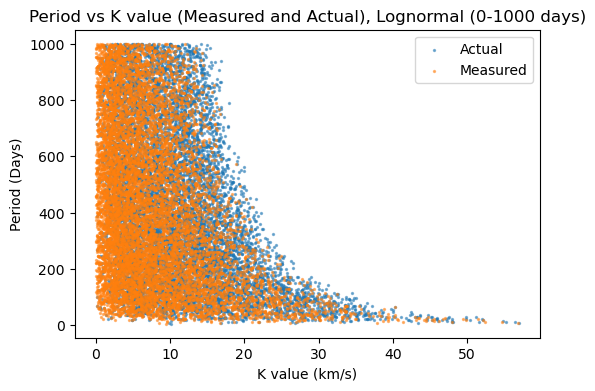

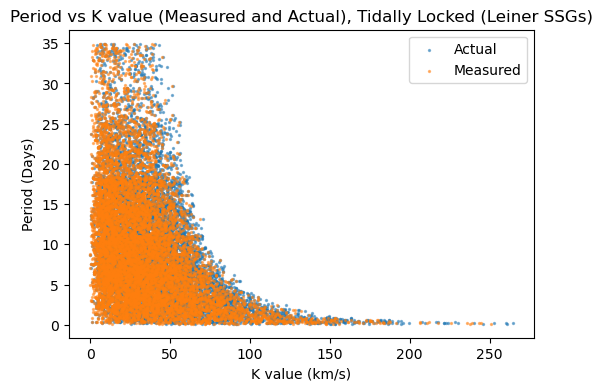

In [23]:
def plotscatter(actual, measured, periods, title):
    plt.figure(figsize = (6,4))
    plt.scatter(actual, periods, marker = ".", s = 8, alpha = 0.5, label = "Actual")
    plt.scatter(measured, periods, marker = ".", s = 8, alpha = 0.5, label = "Measured")
    plt.ylabel("Period (Days)")
    plt.xlabel("K value (km/s)")
    plt.title("Period vs K value (Measured and Actual), " + title)
    plt.legend()
    plt.show()


plotscatter(actual1, measured1, periods1, "Lognormal (0-30 days)")
plotscatter(actual2, measured2, periods2, "Lognormal (0-1000 days)")
plotscatter(actual3, measured3, periods3, "Tidally Locked (Leiner SSGs)")

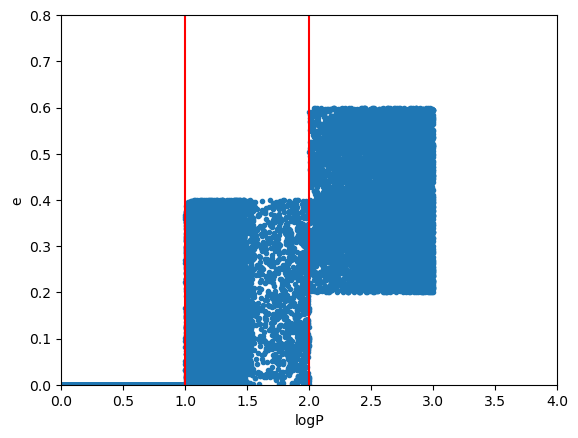

In [25]:
plt.scatter(eccens_logPvals, eccens, marker = ".")
plt.ylim(0, 0.8)
plt.xlim(0,4)
plt.xlabel('logP')
plt.ylabel('e')
plt.axvline(1, color = 'red')
plt.axvline(2, color = 'red')
#eccens, eccens_logPvals

In [28]:
#Now split between orbital periods????
#0-5 days, look at underestimation
#0-10 days, 10-20, 20-30, etc...





57 57
36
57


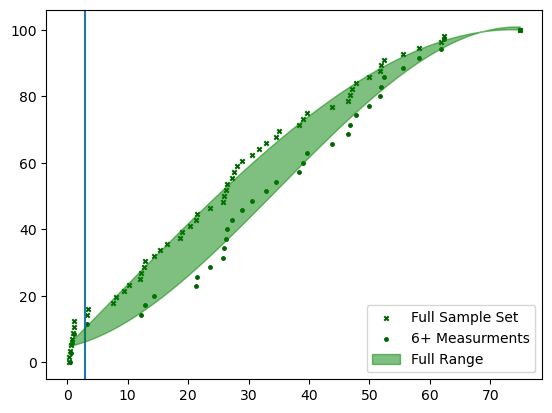

In [31]:
sampnums = [5, 4, 3, 4, 9, 11, 7, 3, 7, 12, 12, 5, 13, 9, 9, 11, 5, 6, 13, 4, 11, 12,
 9, 10, 5, 5, 4, 9, 6, 12, 4, 3, 5, 5, 15, 3, 11, 6, 3, 10, 5, 5, 20, 10,
17, 3, 11, 8, 11, 4, 6, 11, 5, 6, 4]


amps = [0.9850000000000003, 12.76, 3.4899999999999984,47.065, 55.515, 28.86, 34.535, 1.1100000000000012, 12.155000000000001, 
        26.020000000000003, 49.955, 31.655, 43.735, 3.335000000000001, 14.43, 23.58, 74.89, 21.265, 21.265, 20.34, 21.5, 46.72, 
        27.32, 0.504999999999999, 0.27500000000000036, 18.595, 0.27000000000000046, 39.67, 61.86, 32.93, 27.565, 18.915, 12.08, 
        7.54, 51.705, 7.985000000000001, 58.185, 25.81, 62.315, 26.490000000000002, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 
        52.47, 46.435, 51.935, 28.075, 47.86, 30.625, 10.285, 1.0350000000000001, 16.474999999999998]


amps2 = [0.985,12.76,3.49,0.575, 47.065, 55.515, 28.86, 34.535, 1.11, 12.155, 26.02, 39.035, 49.955, 31.655, 43.735, 3.335, 14.43, 
         23.58, 74.89, 21.265, 0.86, 20.34, 21.5, 46.72, 27.32, 0.505, 0.275, 18.595, 0.27, 39.67, 61.86, 32.93, 27.565, 18.915,
         12.08, 7.54, 51.705, 7.985, 58.185, 25.81, 62.315, 26.49, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 52.47, 46.435, 
         51.935,28.075, 47.86, 30.625, 10.285, 1.035, 16.475]


sampnums2 = [5, 4, 3, 9, 4, 9, 12, 7, 3, 7, 12, 12, 12, 6, 13, 9, 11, 11, 5, 6, 13, 4, 12, 12, 9, 10, 5, 5, 4, 9, 6, 12, 4, 4, 5, 5,
             15, 3, 11, 6, 3, 10, 5, 5, 23, 10, 18, 3, 11, 8, 11, 4, 6, 11, 5, 7, 5]

sampnums3 = [5, 4, 3, 8, 4, 9, 11, 7, 3, 7, 12, 12, 12, 5, 13, 9, 9, 11, 5, 6, 13,
             4, 11, 12, 9, 10, 5, 5, 4, 9, 6, 12, 4, 3, 5, 5, 15, 3, 11, 6, 3, 10, 5,
             5, 20, 10, 17, 3, 11, 8, 11, 4, 6, 11, 5, 6, 4]
amps3 = [0.9850000000000003, 12.76, 3.4899999999999984, 0.5749999999999993, 47.065, 55.515,
         28.86, 34.535, 1.1100000000000012, 12.155000000000001, 26.020000000000003, 39.035000000000004, 
         49.955, 31.655, 43.735, 3.335000000000001, 14.43, 23.58, 74.89, 21.265, 0.86, 20.34, 21.5, 
         46.72, 27.32, 0.504999999999999, 0.27500000000000036, 18.595, 0.27000000000000046, 39.67, 61.86, 
         32.93, 27.565, 18.915, 12.08, 7.54, 51.705, 7.985000000000001, 58.185, 25.81, 62.315, 
         26.490000000000002, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 52.47, 46.435, 51.935, 28.075, 47.86, 
         30.625, 10.285, 1.0350000000000001, 16.474999999999998]

amps = amps3
sampnums = sampnums3

ampnew = []
sampnew = []

print(len(sampnums), len(amps))
samplelim = 6
for i in range(len(sampnums)):
    if sampnums[i] >= samplelim:
        ampnew.append(amps[i])
        sampnew.append(sampnums[i])
    if sampnums[i] < samplelim and amps[i] > 50:
        ampnew.append(amps[i])
        sampnew.append(sampnums[i])


print(len(ampnew))
print(len(amps))
STDs = amps




vals1 = np.sort(amps)
p1 = np.arange(len(vals1)) / (len(vals1) - 1)
coefficients = np.polyfit(vals1, p1, 3)
best_fit_line1 = coefficients[0]*vals1**3 + coefficients[1]*vals1**2  + coefficients[2]*vals1 + coefficients[3] 

#plt.scatter(vals1, p1*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2, s = 25)
#plt.plot(vals1, best_fit_line1*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)




vals2 = np.sort(ampnew)
p2 = np.arange(len(vals2)) / (len(vals2) - 1)
coefficients = np.polyfit(vals2, p2, 3)

best_fit_line2 = coefficients[0]*vals2**3 + coefficients[1]*vals2**2  + coefficients[2]*vals2 + coefficients[3] 
#plt.scatter(vals2, p2*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2, s = 25)
#plt.plot(vals2, best_fit_line2*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)

# Ensure we use the same x-values for both fits
common_x = np.linspace(min(vals1.min(), vals2.min()), max(vals1.max(), vals2.max()), 100)

# Evaluate both polynomial fits at these x-values
best_fit_line1_common = np.polyval(np.polyfit(vals1, p1, 3), common_x)
best_fit_line2_common = np.polyval(np.polyfit(vals2, p2, 3), common_x)

# Plot original data and fits
plt.scatter(vals1, p1 * 100, color='darkgreen', marker='x', label="Full Sample Set", zorder=2, s=10)
#plt.plot(common_x, best_fit_line1_common * 100, color='g', linewidth=6, alpha=0.35, zorder=3)
plt.scatter(vals2, p2 * 100, color='darkgreen', marker='.', label=f"{samplelim}+ Measurments", zorder=2, s=25)
#plt.plot(common_x, best_fit_line2_common * 100, color='g', linewidth=6, alpha=0.35, zorder=5)

# Fill the area between the two curves
plt.fill_between(common_x, best_fit_line1_common * 100, best_fit_line2_common * 100, color='g', alpha=0.5, label='Full Range', zorder=5)
plt.axvline(3)
# Show the plot
plt.legend()
plt.show()

57
7.824561403508772
3 20


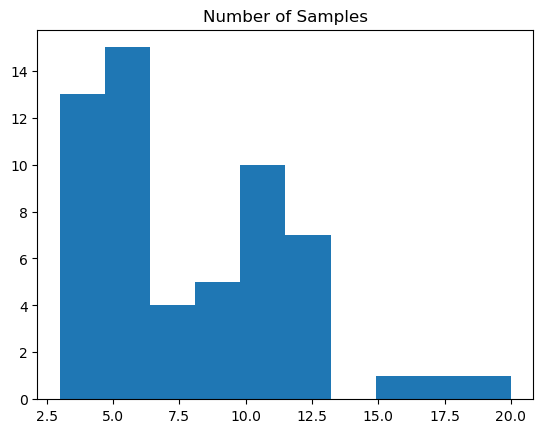

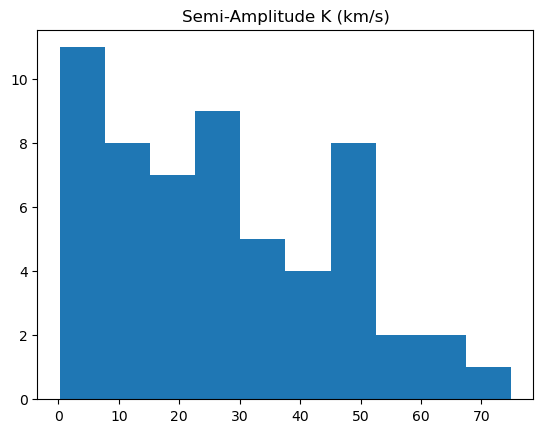

In [17]:
sampnums = [5, 4, 3, 8, 4, 9, 11, 7, 3, 7, 12, 12, 12, 5, 13, 9, 9, 11, 5, 6, 13,
             4, 11, 12, 9, 10, 5, 5, 4, 9, 6, 12, 4, 3, 5, 5, 15, 3, 11, 6, 3, 10, 5,
             5, 20, 10, 17, 3, 11, 8, 11, 4, 6, 11, 5, 6, 4]
print(len(sampnums))
print(np.mean(sampnums))
print(np.min(sampnums), np.max(sampnums))

amps = [0.9850000000000003, 12.76, 3.4899999999999984, 0.5749999999999993, 47.065, 55.515,
         28.86, 34.535, 1.1100000000000012, 12.155000000000001, 26.020000000000003, 39.035000000000004, 
         49.955, 31.655, 43.735, 3.335000000000001, 14.43, 23.58, 74.89, 21.265, 0.86, 20.34, 21.5, 
         46.72, 27.32, 0.504999999999999, 0.27500000000000036, 18.595, 0.27000000000000046, 39.67, 61.86, 
         32.93, 27.565, 18.915, 12.08, 7.54, 51.705, 7.985000000000001, 58.185, 25.81, 62.315, 
         26.490000000000002, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 52.47, 46.435, 51.935, 28.075, 47.86, 
         30.625, 10.285, 1.0350000000000001, 16.474999999999998]


plt.hist(sampnums, bins = 10)
plt.title("Number of Samples")
plt.show()
plt.hist(amps, bins = 10)
plt.title("Semi-Amplitude K (km/s)")
plt.show()

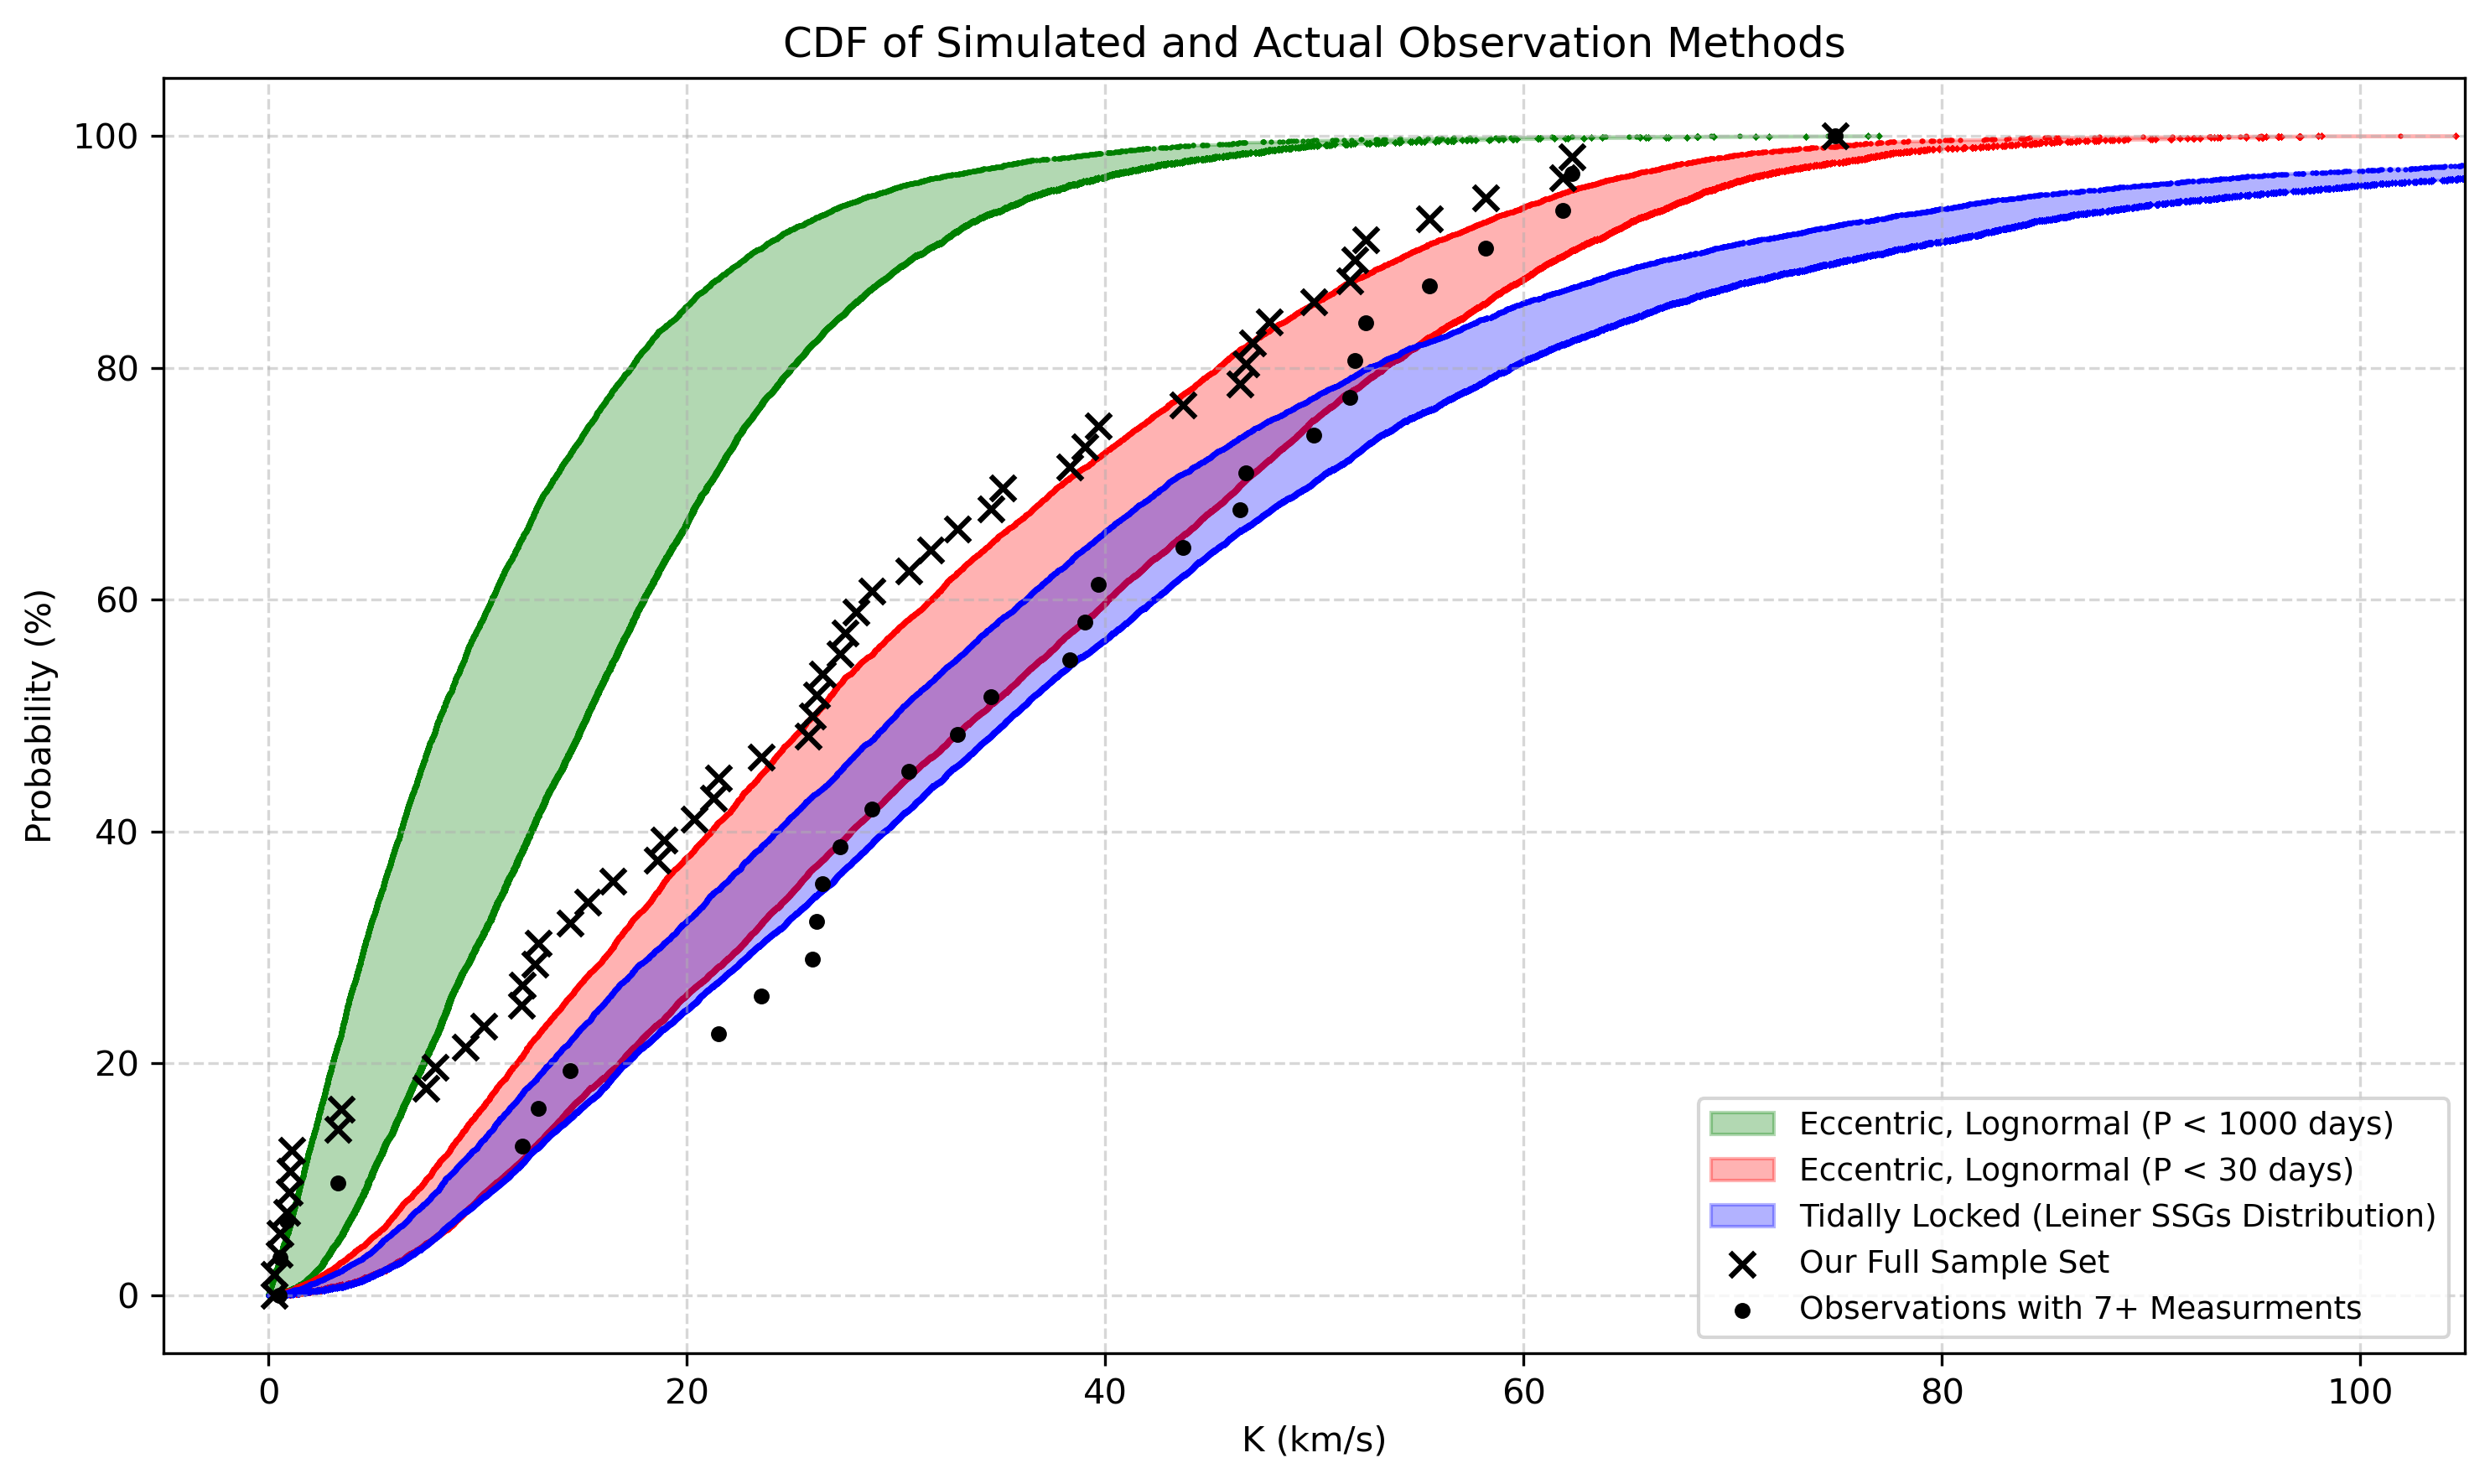

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

plt.figure(figsize=(10, 6), dpi = 300)
'''
for actual, measured, label, color in zip([actual1, actual2, actual3], [measured1, measured2, measured3], 
                                          ['Lognormal (0-30 days)', 'Lognormal (0-1000 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                          ['red', 'green', 'blue']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color, alpha = 0.5)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color, alpha = 0.5)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.25, label = f"{label}")'''


##################
##################
'''
for actual, measured, label, color in zip([actual1e, actual2e, actual3e], [measured1e, measured2e, measured3e], 
                                          ['Eccentric, Lognormal (0-30 days)', 'Eccentric, Lognormal (0-1000 days)', 'Eccentric, Tidally Locked (Leiner SSGs Distribution)'],
                                          ['orangered', 'lightgreen', 'cyan']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color, alpha = 0.5)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color, alpha = 0.5)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.25, label = f"{label}")'''

##################
##################
'''
for actual, measured, label, color in zip([actual1e, actual2e], [measured1e, measured2e], 
                                          ['Eccentric, Lognormal (0-30 days)', 'Eccentric, Lognormal (0-1000 days)'],
                                          ['magenta', 'lightgreen']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")
'''

##################
##################
'''
#First set (Tidally Locked)
for actual, measured, label, color in zip([actual3], [measured3], 
                                          ['Tidally Locked (Leiner SSGs Distribution)'],
                                          ['blue']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")
'''


##################
##################

'''
#Second Set (Eccentric lognormal 0-30, and Tidally Locked
for actual, measured, label, color in zip([actual1e, actual3], [measured1e, measured3], 
                                          ['Eccentric, Lognormal (0-30 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                          ['red', 'blue']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")
'''


##################
##################


#Third Set, ALL
for actual, measured, label, color in zip([actual2e, actual1e, actual3], [measured2e, measured1e, measured3], 
                                          ['Eccentric, Lognormal (P < 1000 days)', 'Eccentric, Lognormal (P < 30 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                          ['green', 'red', 'blue']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    #plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    #plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.scatter(actual_sorted, actual_cdf * 100, color=color, s = 1, marker = 'x')
    plt.scatter(measured_sorted, measured_cdf * 100, color=color, s = 1, marker = '.')
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")



##################
##################
'''


#Alternate 1
for actual, measured, label, color in zip([actual2e, actual1e, actual3], [measured2e, measured1e, measured3], 
                                          ['Eccentric, Lognormal (0-1000 days)'],
                                          ['green']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")
'''

##################
##################


'''
#Alternate 2
for actual, measured, label, color in zip([actual2e, actual1e], [measured2e, measured1e], 
                                          ['Eccentric, Lognormal (0-1000 days)', 'Eccentric, Lognormal (0-30 days)'],
                                          ['green', 'red']):
    actual_sorted = np.sort(actual)
    actual_cdf = rankdata(actual_sorted, method='average') / len(actual_sorted)
    measured_sorted = np.sort(measured)
    measured_cdf = rankdata(measured_sorted, method='average') / len(measured_sorted)
    
    plt.plot(actual_sorted, actual_cdf * 100, linestyle='-', color=color)
    plt.plot(measured_sorted, measured_cdf * 100, linestyle='--', color=color)
    plt.fill_betweenx(actual_cdf*100, actual_sorted, measured_sorted, color=color, alpha=0.3, label = f"{label}")
'''


##################
##################

sampnums = [5, 4, 3, 8, 4, 9, 11, 7, 3, 7, 12, 12, 12, 5, 13, 9, 9, 11, 5, 6, 13,
             4, 11, 12, 9, 10, 5, 5, 4, 9, 6, 12, 4, 3, 5, 5, 15, 3, 11, 6, 3, 10, 5,
             5, 20, 10, 17, 3, 11, 8, 11, 4, 6, 11, 5, 6, 4]
amps = [0.9850000000000003, 12.76, 3.4899999999999984, 0.5749999999999993, 47.065, 55.515,
         28.86, 34.535, 1.1100000000000012, 12.155000000000001, 26.020000000000003, 39.035000000000004, 
         49.955, 31.655, 43.735, 3.335000000000001, 14.43, 23.58, 74.89, 21.265, 0.86, 20.34, 21.5, 
         46.72, 27.32, 0.504999999999999, 0.27500000000000036, 18.595, 0.27000000000000046, 39.67, 61.86, 
         32.93, 27.565, 18.915, 12.08, 7.54, 51.705, 7.985000000000001, 58.185, 25.81, 62.315, 
         26.490000000000002, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 52.47, 46.435, 51.935, 28.075, 47.86, 
         30.625, 10.285, 1.0350000000000001, 16.474999999999998]

ampnew = []
sampnew = []

#print(len(sampnums), len(amps))
samplelim = 7
for i in range(len(sampnums)):
    if sampnums[i] >= samplelim:
        ampnew.append(amps[i])
        sampnew.append(sampnums[i])
    if sampnums[i] < samplelim and amps[i] > 50:
        ampnew.append(amps[i])
        sampnew.append(sampnums[i])


#print(len(ampnew))
#print(len(amps))
STDs = amps




vals1 = np.sort(amps)
p1 = np.arange(len(vals1)) / (len(vals1) - 1)
coefficients = np.polyfit(vals1, p1, 3)
best_fit_line1 = coefficients[0]*vals1**3 + coefficients[1]*vals1**2  + coefficients[2]*vals1 + coefficients[3] 

#plt.scatter(vals1, p1*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2, s = 25)
#plt.plot(vals1, best_fit_line1*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)




vals2 = np.sort(ampnew)
p2 = np.arange(len(vals2)) / (len(vals2) - 1)
coefficients = np.polyfit(vals2, p2, 3)

best_fit_line2 = coefficients[0]*vals2**3 + coefficients[1]*vals2**2  + coefficients[2]*vals2 + coefficients[3] 
#plt.scatter(vals2, p2*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2, s = 25)
#plt.plot(vals2, best_fit_line2*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)

# Ensure we use the same x-values for both fits
common_x = np.linspace(min(vals1.min(), vals2.min()), max(vals1.max(), vals2.max()), 100)

# Evaluate both polynomial fits at these x-values
best_fit_line1_common = np.polyval(np.polyfit(vals1, p1, 3), common_x)
best_fit_line2_common = np.polyval(np.polyfit(vals2, p2, 3), common_x)


# Fill the area between the two curves
#plt.fill_between(common_x, best_fit_line1_common * 100, best_fit_line2_common * 100, color='black', alpha=0.25, label='Our Observations', zorder=5)
# Plot original data and fits

plt.scatter(vals1, p1 * 100, color='black', marker='x', label="Our Full Sample Set", zorder=6, s=50)
#plt.plot(common_x, best_fit_line1_common * 100, color='g', linewidth=6, alpha=0.35, zorder=3)

plt.scatter(vals2, p2 * 100, color='black', marker='.', label=f"Observations with {samplelim}+ Measurments", zorder=6, s=50)
#plt.plot(common_x, best_fit_line2_common * 100, color='g', linewidth=6, alpha=0.35, zorder=5)





##################
##################






plt.xlabel('K (km/s)')
plt.ylabel('Probability (%)')
plt.title('CDF of Simulated and Actual Observation Methods')

plt.xlim(-5, 105)
plt.ylim(-5, 105)
#plt.xlim(105, -5)
#plt.ylim(105, -5)
plt.legend()
plt.grid(alpha = 0.5, linestyle = "--")
plt.legend(loc='lower right', fontsize=9)
plt.tight_layout()
#plt.savefig("Sim_Full_Eccens_No_Fill.png", dpi = 500)
#plt.savefig("CDF_Paper", dpi = 300)
plt.show()


In [34]:
#K-S Test...
#https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

#KS statistic = Max difference between both CDFs
#P-value = correlation. >0.05 means significant correlation, probably similar underlying distribution





In [48]:
from scipy.stats import ks_2samp
print(f"""
KS Test - Comparing two CDF values to identify similarities in CDF and underlying distribution:
    KS statistic: Max difference between both CDFs, value of 0-1 (0-100%, y axis)
        Large KS = Large difference = LESS similarity
        Small KS = Small difference = MORE similarity
    
    p-value: are these data sets drawn from the same underlying distribution?
        Large p (p > 0.05) = sets are drawn from SIMILAR (or same) distribution
        Small p (p < 0.05) = sets are drawn from DIFFERENT distributions

The following code looks at the difference between our sampled data
    Full Distribution
    {samplelim}+ measurements
It compares these datasets to the "Measured" and "Actual" datasets created from the three underlying distributions we want to compare:
    Eccentric, Lognormal (0-1000 days)
    Eccentric, Lognormal (0-30 days)
    Tidally Locked (Leiner SSGs Distribution)

So, we're looking for the results with the LOWEST KS value, and HIGHEST p values:

""")
print("##"*25)
print()
aKSval = []
mKSval = []
apval = []
mpval = []

def KS(amps, start):
    print(start)
    for actual, measured, label, color in zip([actual2e, actual1e, actual3], [measured2e, measured1e, measured3], 
                                              ['Eccentric, Lognormal (0-1000 days)', 'Eccentric, Lognormal (0-30 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                              ['green', 'red', 'blue']):
        print(label)
        ks_statistic, p_value = ks_2samp(amps, measured)
        print(f"  Measured: KS Statistic = {ks_statistic:.4f}, P-value = {p_value:.4f}")
        mKSval.append(ks_statistic)
        mpval.append(p_value)
        # Interpretation
        alpha = 0.05  # Significance level
        '''if p_value < alpha:
            print("p < 0.05; The distributions are different.")
        else:
            print("p > 0.05; The distributions are similar.")'''


        
        ks_statistic, p_value = ks_2samp(amps, actual)
        print(f"  Actual:   KS Statistic = {ks_statistic:.4f}, P-value = {p_value:.4f}")
        aKSval.append(ks_statistic)
        apval.append(p_value)
        '''
        # Interpretation
        alpha = 0.05  # Significance level
        if p_value < alpha:
            print("p < 0.05; The distributions are different.")
        else:
            print("p > 0.05; The distributions are similar.")'''
        print()
    print("##"*25)
    print()

KS(amps, "Full Distribution")
KS(ampnew, f"Observations with {samplelim}+ Measurments")


KS Test - Comparing two CDF values to identify similarities in CDF and underlying distribution:
    KS statistic: Max difference between both CDFs, value of 0-1 (0-100%, y axis)
        Large KS = Large difference = LESS similarity
        Small KS = Small difference = MORE similarity
    
    p-value: are these data sets drawn from the same underlying distribution?
        Large p (p > 0.05) = sets are drawn from SIMILAR (or same) distribution
        Small p (p < 0.05) = sets are drawn from DIFFERENT distributions

The following code looks at the difference between our sampled data
    Full Distribution
    7+ measurements
It compares these datasets to the "Measured" and "Actual" datasets created from the three underlying distributions we want to compare:
    Eccentric, Lognormal (0-1000 days)
    Eccentric, Lognormal (0-30 days)
    Tidally Locked (Leiner SSGs Distribution)

So, we're looking for the results with the LOWEST KS value, and HIGHEST p values:


########################

In [49]:
print(mKSval)
print(aKSval)
print()
print(mpval)
print(apval)

[0.46276894736842106, 0.14412859649122806, 0.15417859649122806, 0.66149, 0.21610000000000001, 0.15075]
[0.34639578947368427, 0.20337508771929824, 0.22697508771929825, 0.54268, 0.11725, 0.14341000000000004]

[1.0712957932626794e-11, 0.1696953114754539, 0.11954409601451998, 2.774069201944087e-14, 0.08613547147362843, 0.419752981910661]
[1.2937856422926988e-06, 0.015227742665831712, 0.004612850678380798, 2.3430291200095437e-09, 0.7276073814510137, 0.48213889472571714]


In [120]:
print("KS, measured sets:", [f"{val:.4f}" for val in mKSval])
print("KS, actual sets:  ", [f"{val:.4f}" for val in aKSval])
print()
print("p-val, measured sets:", [f"{val:.4f}" for val in mpval])
print("p-val, actual sets:  ", [f"{val:.4f}" for val in apval])


KS, measured sets: ['0.4617', '0.1442', '0.1550', '0.6612', '0.2152', '0.1490']
KS, actual sets:   ['0.3457', '0.2023', '0.2273', '0.5423', '0.1172', '0.1446']

p-val, measured sets: ['0.0000', '0.1695', '0.1161', '0.0000', '0.0883', '0.4344']
p-val, actual sets:   ['0.0000', '0.0160', '0.0045', '0.0000', '0.7282', '0.4721']


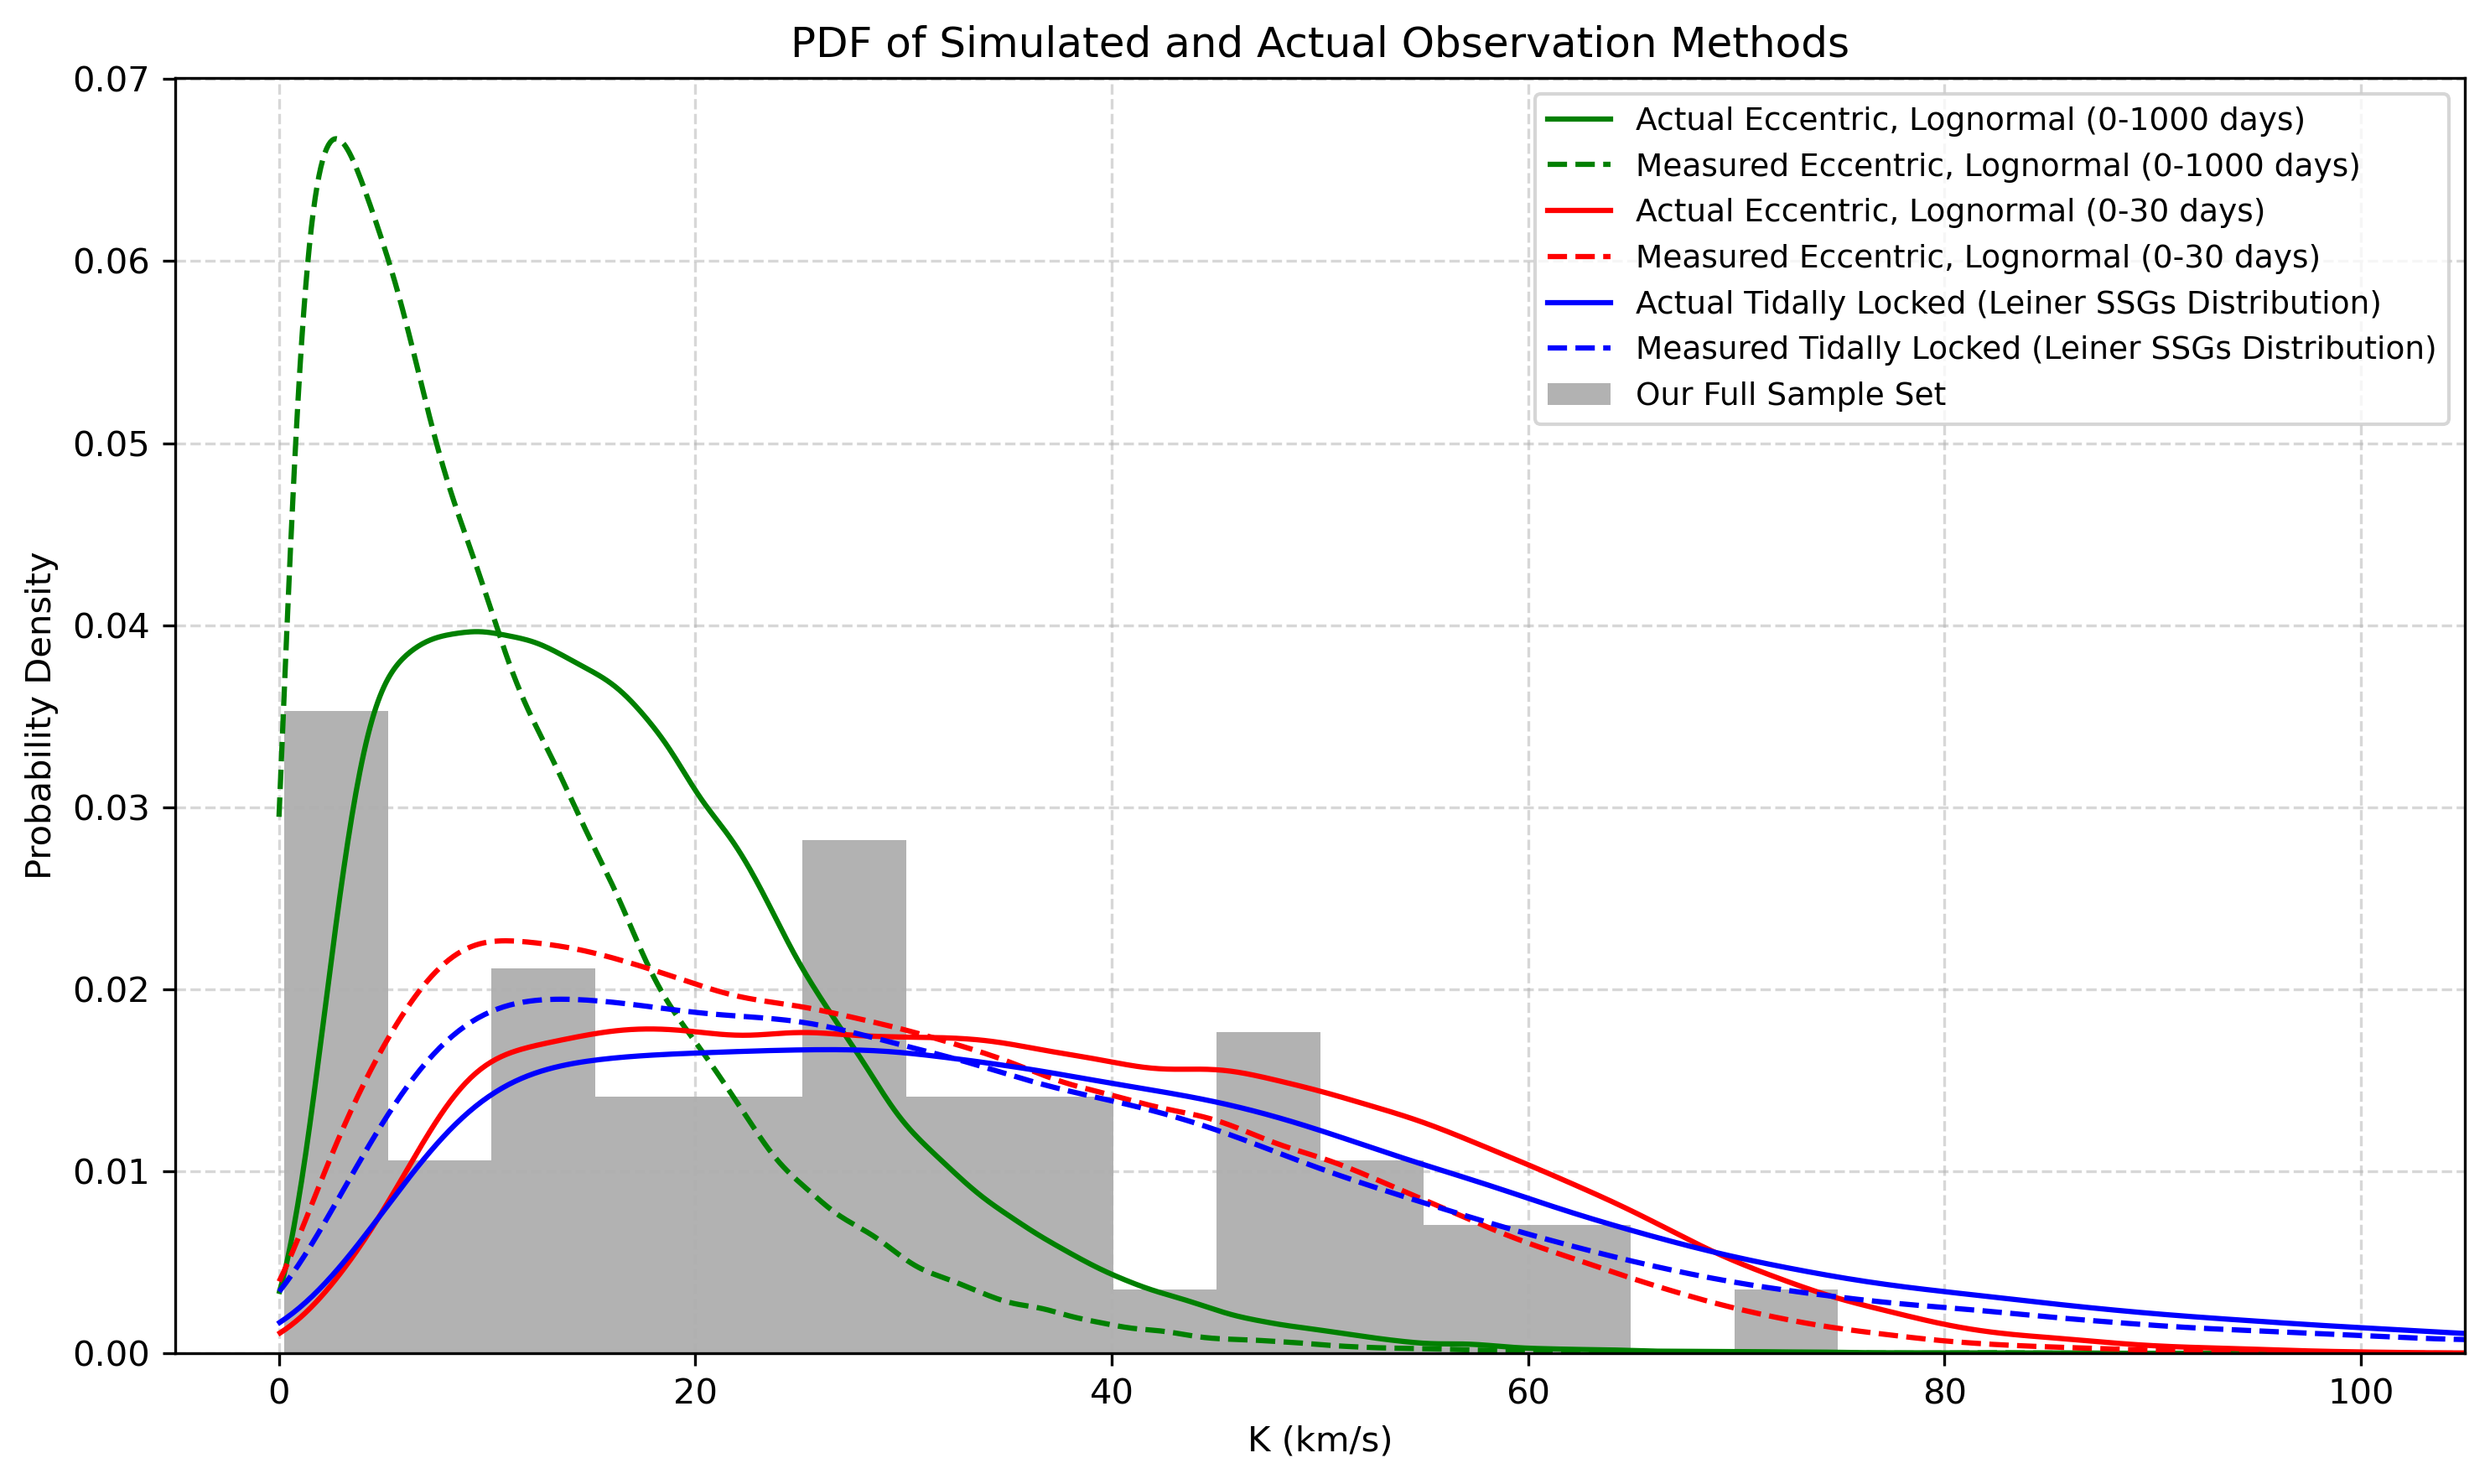

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6), dpi=300)

# Function to compute and plot the PDF
def plot_pdf(data, label, color, linestyle = "-"):
    kde = gaussian_kde(data, bw_method='scott')  # Kernel Density Estimation
    x_vals = np.linspace(min(data), max(data), 1000)
    pdf_vals = kde(x_vals)
    plt.plot(x_vals, pdf_vals, color=color, label=label, linestyle = linestyle)

# Replace CDF calculations with PDFs
for actual, measured, label, color in zip([actual2e, actual1e, actual3], [measured2e, measured1e, measured3], 
                                          ['Eccentric, Lognormal (0-1000 days)', 'Eccentric, Lognormal (0-30 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                          ['green', 'red', 'blue']):
    plot_pdf(actual, f"Actual {label}", color)
    plot_pdf(measured, f"Measured {label}", color, "--")

# Histogram-based PDF for amp-related data
plt.hist(amps, bins=15, density=True, alpha=0.3, color='black', label='Our Full Sample Set', histtype='stepfilled')
#plt.hist(amps, bins=12, density=True, alpha=0.8, color='black', label='Our Full Sample Set', histtype='step')
#plt.hist(ampnew, bins=15, density=True, alpha=0.3, color='m', label=f'Observations with {samplelim}+ Measurements', histtype='stepfilled')

# Plot settings
plt.xlabel('K (km/s)')
plt.ylabel('Probability Density')
plt.title('PDF of Simulated and Actual Observation Methods')
plt.legend(loc='upper right', fontsize=9)
plt.grid(alpha=0.5, linestyle="--")
plt.xlim(-5, 105)
plt.tight_layout()
#plt.savefig("PDF1.png", dpi = 300)
plt.show()


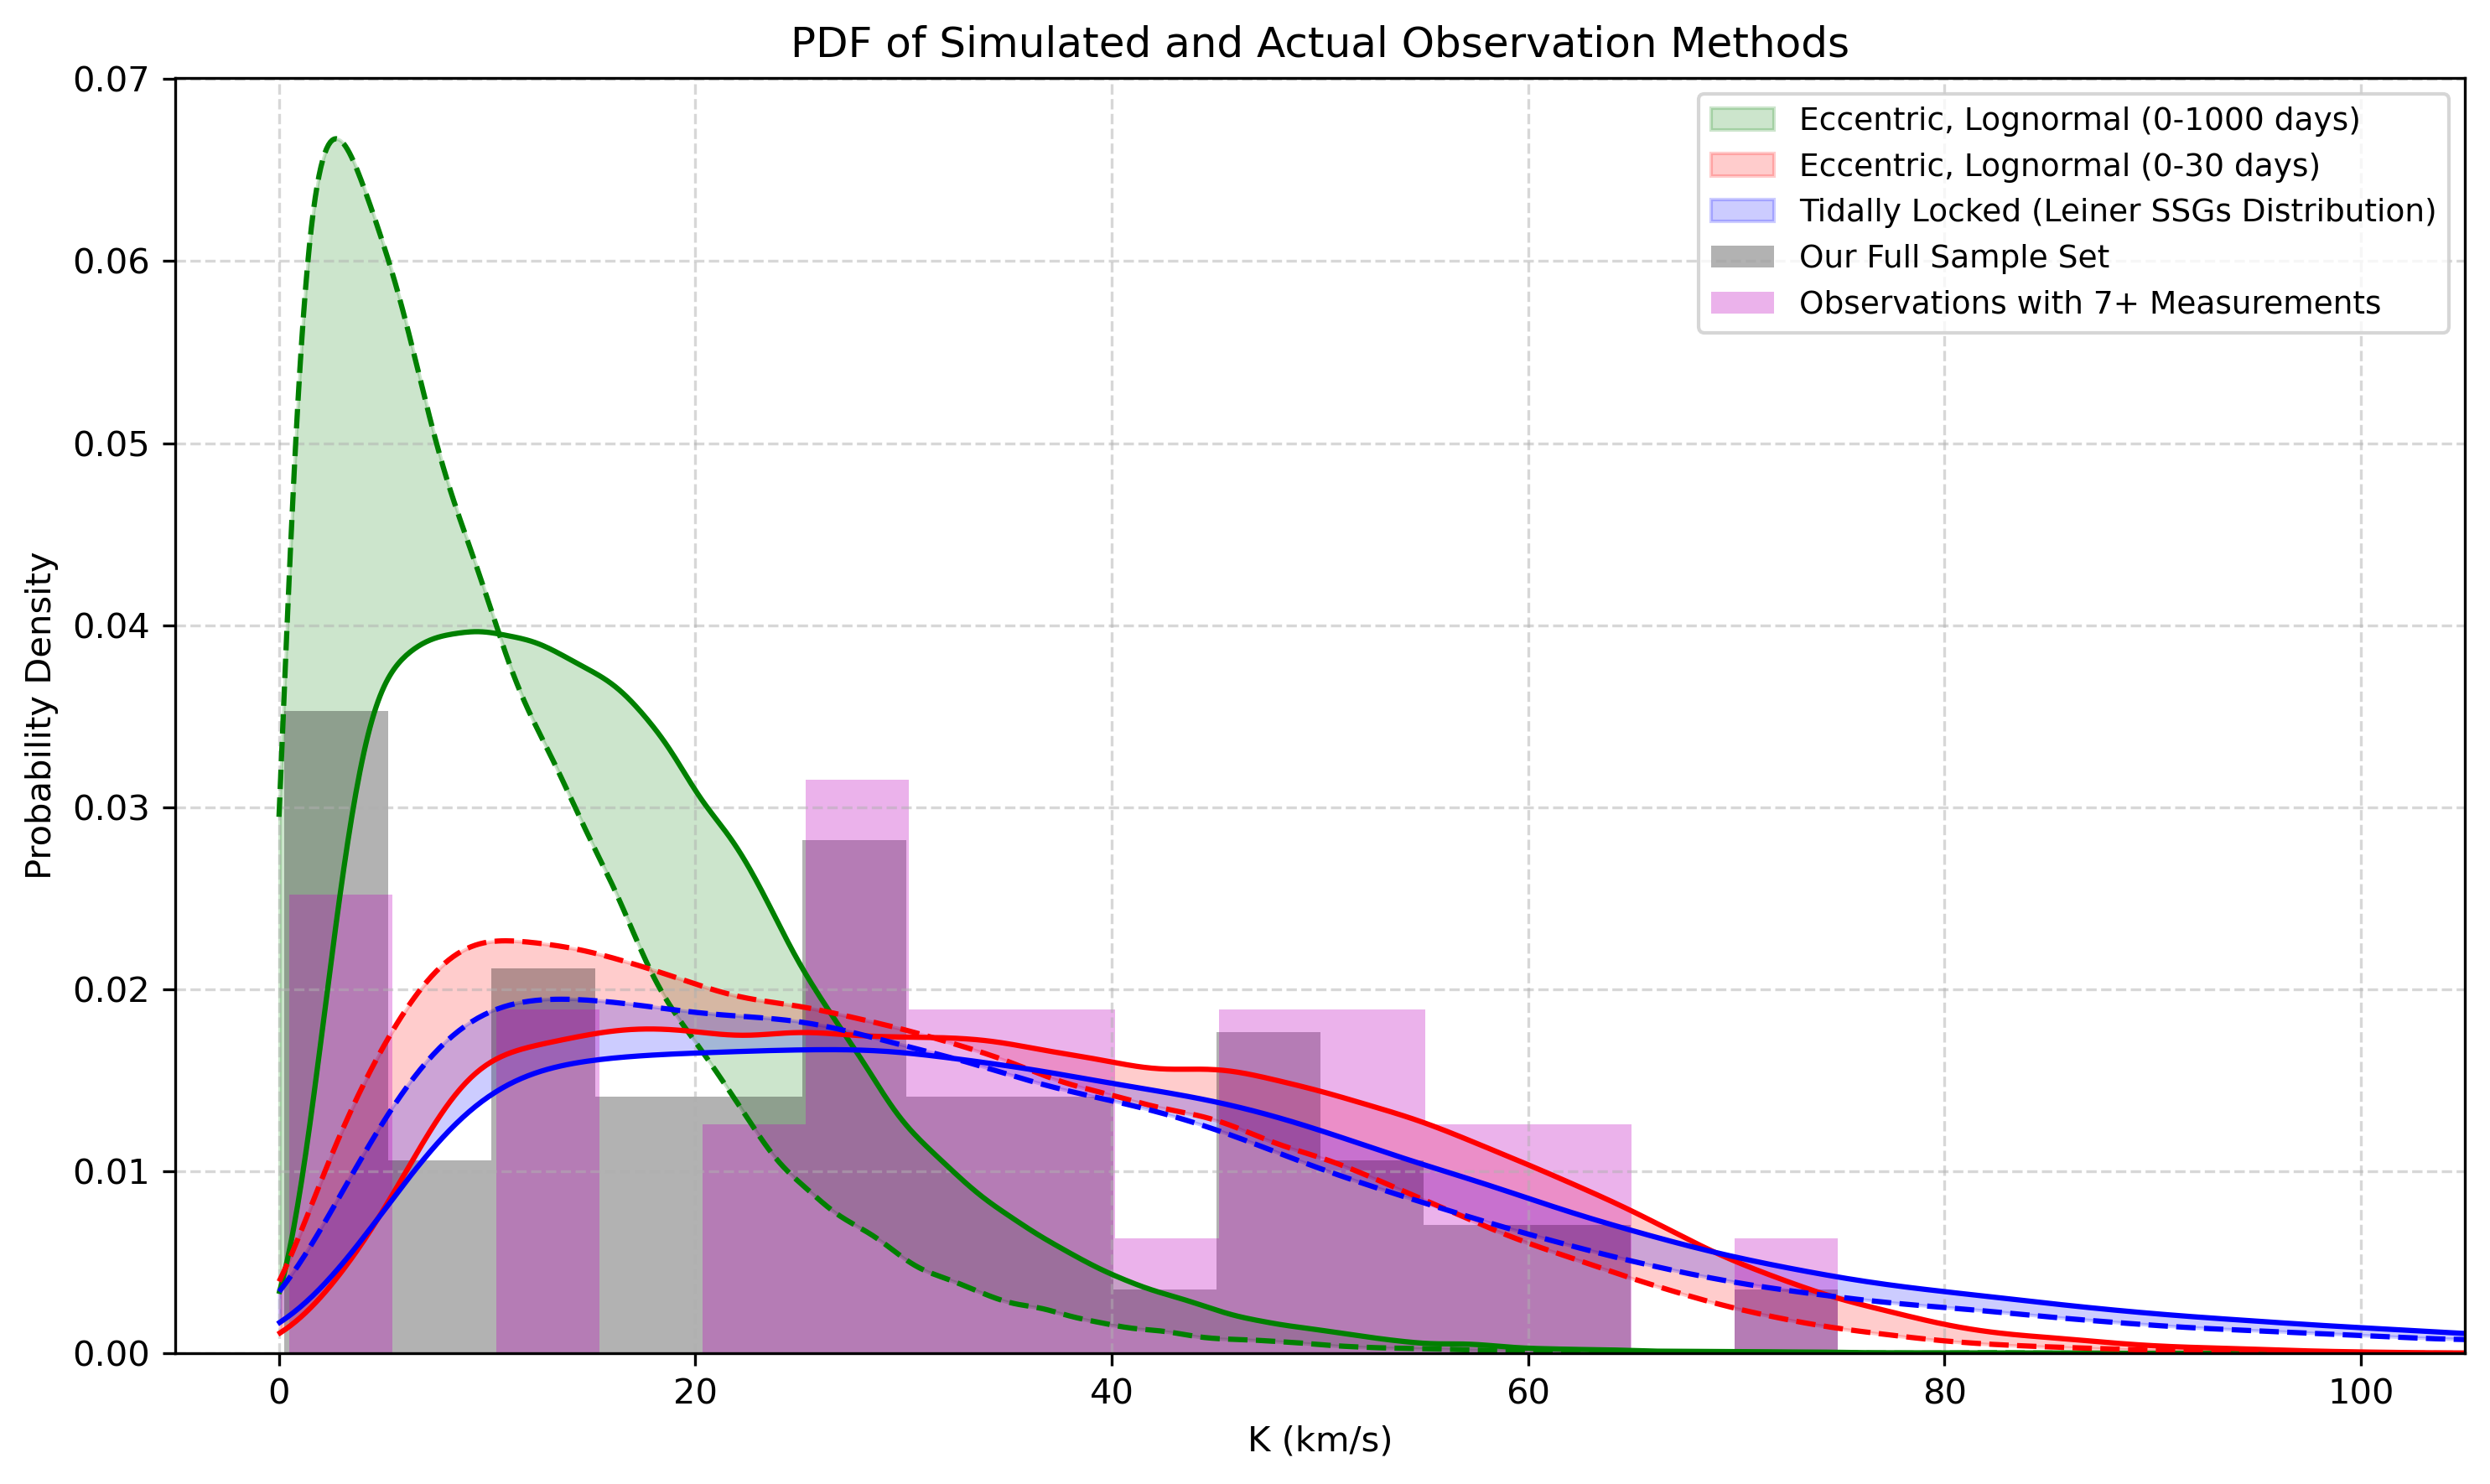

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6), dpi=300)

# Function to compute the PDF
def compute_pdf(data):
    kde = gaussian_kde(data, bw_method='scott')  # Kernel Density Estimation
    x_vals = np.linspace(min(data), max(data), 1000)
    pdf_vals = kde(x_vals)
    return x_vals, pdf_vals

# Function to plot the PDF
def plot_pdf(x_vals, pdf_vals, color, linestyle="-"):#label,
    plt.plot(x_vals, pdf_vals, color=color, linestyle=linestyle)#label,

# Plot PDFs and shaded regions
for actual, measured, label, color in zip([actual2e, actual1e, actual3], [measured2e, measured1e, measured3], 
                                          ['Eccentric, Lognormal (0-1000 days)', 'Eccentric, Lognormal (0-30 days)', 'Tidally Locked (Leiner SSGs Distribution)'],
                                          ['green', 'red', 'blue']):
    x_actual, pdf_actual = compute_pdf(actual)
    x_measured, pdf_measured = compute_pdf(measured)
    
    plot_pdf(x_actual, pdf_actual, color)#, f"Actual {label}"
    plot_pdf(x_measured, pdf_measured, color, "--")#, f"Measured {label}"
    
    # Ensure the x values match up for shading
    x_common = np.linspace(max(min(x_actual), min(x_measured)), min(max(x_actual), max(x_measured)), 1000)
    pdf_actual_interp = np.interp(x_common, x_actual, pdf_actual)
    pdf_measured_interp = np.interp(x_common, x_measured, pdf_measured)
    
    plt.fill_between(x_common, pdf_actual_interp, pdf_measured_interp, color=color, alpha=0.2, label = f"{label}")

# Histogram-based PDF for amp-related data
plt.hist(amps, bins=15, density=True, alpha=0.3, color='black', label='Our Full Sample Set', histtype='stepfilled')
#plt.hist(amps, bins=12, density=True, alpha=0.8, color='black', label='Our Full Sample Set', histtype='step')
plt.hist(ampnew, bins=15, density=True, alpha=0.3, color='m', label=f'Observations with {samplelim}+ Measurements', histtype='stepfilled')

# Plot settings
plt.xlabel('K (km/s)')
plt.ylabel('Probability Density')
plt.title('PDF of Simulated and Actual Observation Methods')
plt.legend(loc='upper right', fontsize=9)
plt.grid(alpha=0.5, linestyle="--")
plt.xlim(-5, 105)
plt.tight_layout()
#plt.savefig("PDF4.png", dpi=300)
plt.show()
